### <font style="color:rgb(50,120,229)">Add Text</font>

Finally, let's see how we can write some text on an image using **`cv2.putText`** function.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
```

The mandatory arguments that we need to focus on are:

1. `img`: Image on which the text has to be written.
2. `text`: Text string to be written.
3. `org`: **Bottom-left corner of the text string in the image**.
4. `fontFace`: Font type
5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.
6. `color`: Font color


The optional arguments that we are going to use are same as before.

In [1]:
# Import cv2 module
import cv2
from dataPath import DATA_PATH

In [2]:
# Import matplotlib for displaying image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [4]:
# Path to the image we are going to read
# This can be an absolute or relative path
# Here we are using a relative path
imageName = DATA_PATH+"images/boy.jpg"

# Load the image
image = cv2.imread(imageName, cv2.IMREAD_COLOR)

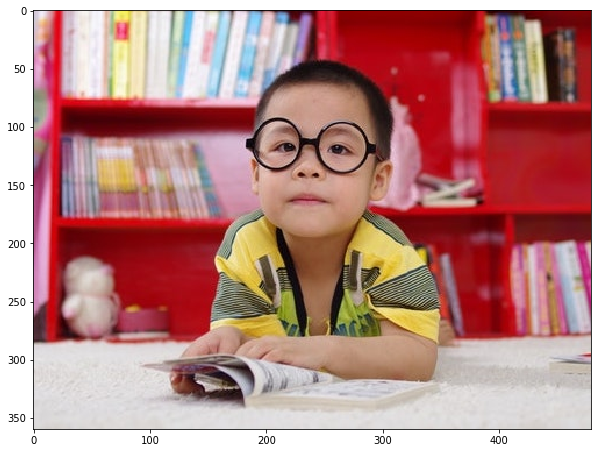

In [5]:
# Display the original image
plt.imshow(image[:,:,::-1])

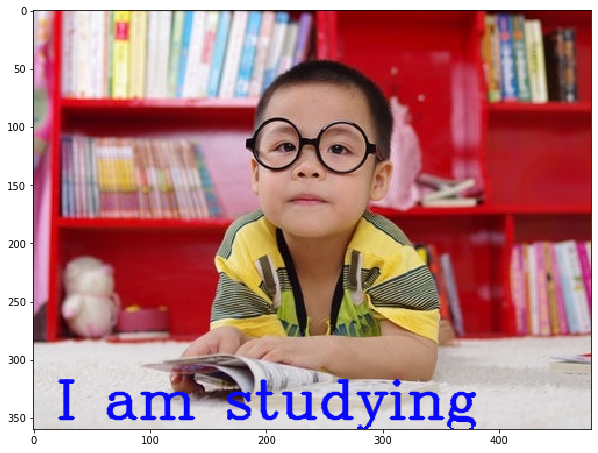

In [6]:
# Put text into image
imageText = image.copy()
text = "I am studying"
fontScale = 1.5
fontFace = cv2.FONT_HERSHEY_COMPLEX
fontColor = (250, 10, 10)
fontThickness = 2
cv2.putText(imageText, text, (20, 350), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:,:,::-1])

## <font style="color:rgb(50,120,229)">Issues in Text annotation </font>

There are a few issues with annotating with text.

* First, the text looks pretty big. This happens very often because it is difficult to say before-hand what size text you should use. If the image is very large, `fontScale=1.5` can look too small and vice-versa. 
* Second, You can see the bottom part of the text is slightly clipped. This happens because we dont know how big the text will look on the image. 

There are ways to get the fontScale that we should use, which depend on the image itself and how much area of the image we want to use for the text. Let us have a look at them.

## <font style="color:rgb(50,120,229)">Solution 1: Get font size from pixel height of text </font>
We had used a fontScale of 1.5 in the previous example. Suppose we want to use a text which has a height of 20 pixels only, what should be the fontScale? There is an OpenCV function `getFontScaleFromHeight` which calculates the fontScale given the height and font.


### <font style="color:rgb(8,133,37)"> Function Syntax </font>

```python
fontScale	=	cv2.getFontScaleFromHeight(	fontFace, pixelHeight[, thickness]	)
```

**Parameters**

- **`fontFace`** - Font to use
- **`pixelHeight`** - Pixel height to compute the fontScale for
- **`thickness`** - Thickness of lines used to render the text. See putText for details
- **`fontScale`** (Output) - The fontsize to use in **`cv2.putText()`** function.

#### <font style="color:rgb(8,133,37)">Example</font>
Instead of using a fontScale, let us use a text height of 20 pixels to determine the fontScale and and write the same text again.

fontScale = 0.8809523809523809


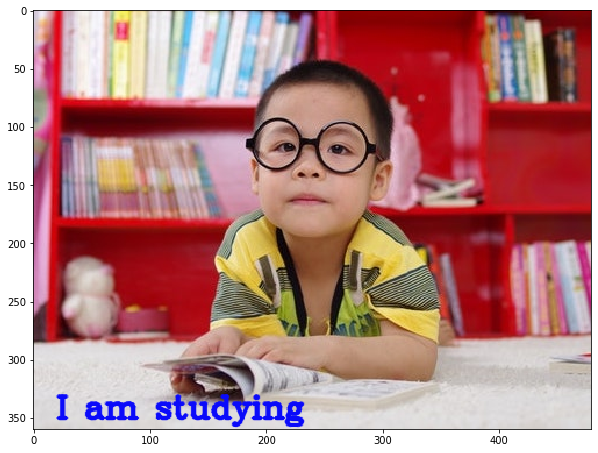

In [7]:
pixelHeight = 20

# Calculate the fontScale
fontScale = cv2.getFontScaleFromHeight(fontFace, pixelHeight, fontThickness)
print("fontScale = {}".format(fontScale))

imageTextFontScale = image.copy()
cv2.putText(imageTextFontScale, text, (20, 350), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);
# Display the image
plt.imshow(imageTextFontScale[:,:,::-1])

## <font style="color:rgb(50,120,229)">Solution 2: Get height and width of text</font>
In the previous example, we printed the text at the bottom left corner. What if we want to center the text? Without knowing how much area the text is going to take, it is not possible to do that. Not only centering, it can be used in other scenarios also. For example, it is difficult to write text when the background is "busy". In those cases, we can create a rectangular canvas and write the text on top of that. 

There is an OpenCV function `getTextSize` which determines the height and width of the text box. Let's see with an example to make it clear.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
textSize, baseLine	=	cv2.getTextSize(	text, fontFace, fontScale, thickness	)
```

**Parameters**

- **`text`** - Input text string.
- **`fontFace`** - Font to use, see HersheyFonts.
- **`fontScale`** - Font scale factor that is multiplied by the font-specific base size.
- **`thickness`** - Thickness of lines used to render the text. See putText for details.
- **`baseLine`** (Output) - y-coordinate of the baseline relative to the bottom-most text point. In our example, this value will be the difference in height of the bottom-most tip of `y` and `i`
- **`textSize`** (Output) - The text size (width, height)



#### <font style="color:rgb(8,133,37)">Example </font>
We will take the fontScale from the previous example and create a white canvas to write the text at the bottom center of the image.

TextWidth = 215, TextHeight = 20, baseLine = 9
TextBox Bottom Left = (132,341)
Canvas Bottom Left = (132, 350), Top Right = (347, 321)


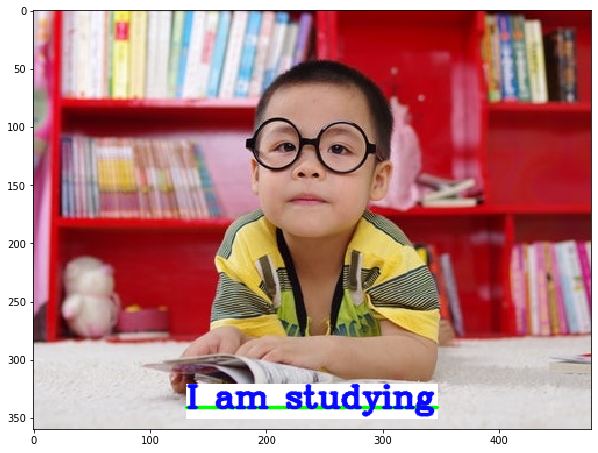

In [8]:
imageGetTextSize = image.copy()
imageHeight, imageWidth=imageGetTextSize.shape[:2]

# Get the text box height and width and also the baseLine
textSize, baseLine = cv2.getTextSize(text,fontFace,fontScale,fontThickness)
textWidth,textHeight = textSize
print("TextWidth = {}, TextHeight = {}, baseLine = {}".format(textWidth, textHeight, baseLine))

# Get the coordinates of text box bottom left corner
# The xccordinate will be such that the text is centered
xcoordinate = (imageWidth - textWidth)//2
# The y coordinate will be such that the entire box is just 10 pixels above the bottom of image
ycoordinate = (imageHeight - baseLine - 10)
print("TextBox Bottom Left = ({},{})".format(xcoordinate,ycoordinate))

# Draw the Canvas using a filled rectangle
canvasColor = (255, 255, 255)
canvasBottomLeft = (xcoordinate,ycoordinate+baseLine)
canvasTopRight = (xcoordinate+textWidth, ycoordinate-textHeight)
cv2.rectangle(imageGetTextSize, canvasBottomLeft, canvasTopRight, canvasColor, thickness=-1);
print("Canvas Bottom Left = {}, Top Right = {}".format(canvasBottomLeft,canvasTopRight))

# Now draw the baseline ( just for reference )
lineThickness = 2
lineLeft = (xcoordinate, ycoordinate)
lineRight = (xcoordinate+textWidth, ycoordinate)
lineColor = (0,255,0)
cv2.line(imageGetTextSize, lineLeft, lineRight, lineColor, thickness = lineThickness, lineType=cv2.LINE_AA);

# Finally Draw the text
cv2.putText(imageGetTextSize, text, (xcoordinate,ycoordinate), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the Output Image
plt.imshow(imageGetTextSize[...,::-1])